# Naive Bayes

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In a broad sense, Naive Bayes models are a special class of Machine Learning classification algorithms, as we will refer to them from now on. They are based on a statistical classification technique called **“Bayes' theorem”**.

$ \ $

$ \mathbb{P}(A|B) = \cfrac{\mathbb{P}(B|A) \cdot \mathbb{P}(A)}{\mathbb{P}(B)} $

$ \ $

We applied this theorem in the next way. Let $ C $ a class and $ x $ data then:

$ \ $

$ \mathbb{P}(C|x) = \cfrac{\mathbb{P}(x|C) \cdot \mathbb{P}(C)}{\mathbb{P}(x)} $

**We assume all the components of $x$ are independents.**

$ \ $

**Example:** 

$ \ $

$ C = Yes $ 

$ \mathbb{P}(Yes|x) = \cfrac{\mathbb{P}(x|Yes) \cdot \mathbb{P}(Yes)}{\mathbb{P}(x)} $

We observe the following data:

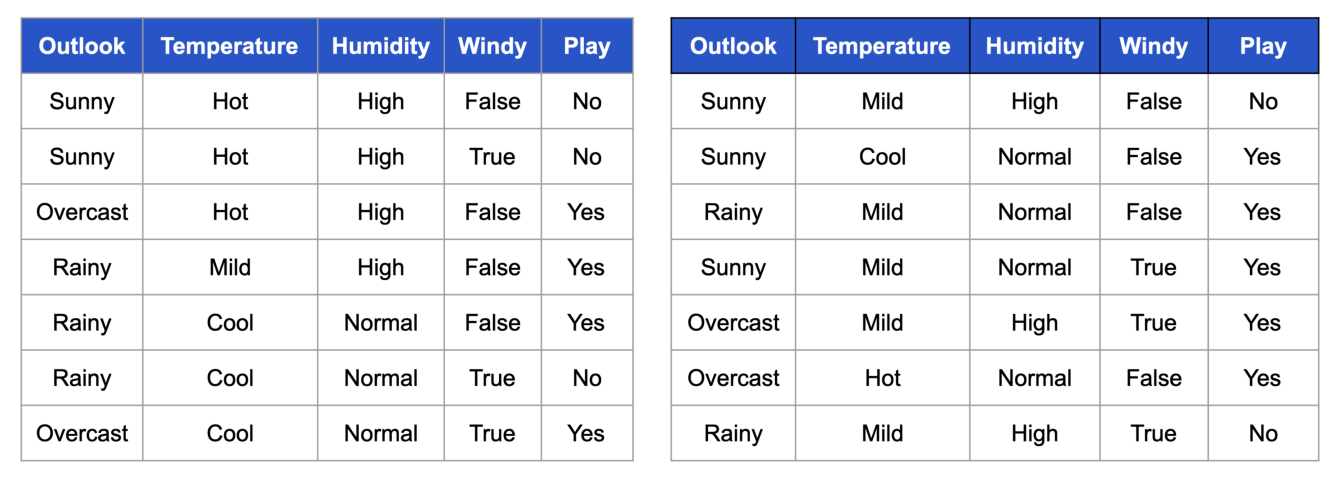

In [4]:
display_img('Table_1.png', 17, 17)

We want to predict the probability to play if $ x = (Outlook = Sunny, Temperature = Cool, Humidity = High, Wind = True) $

We build the next tables of frequency:

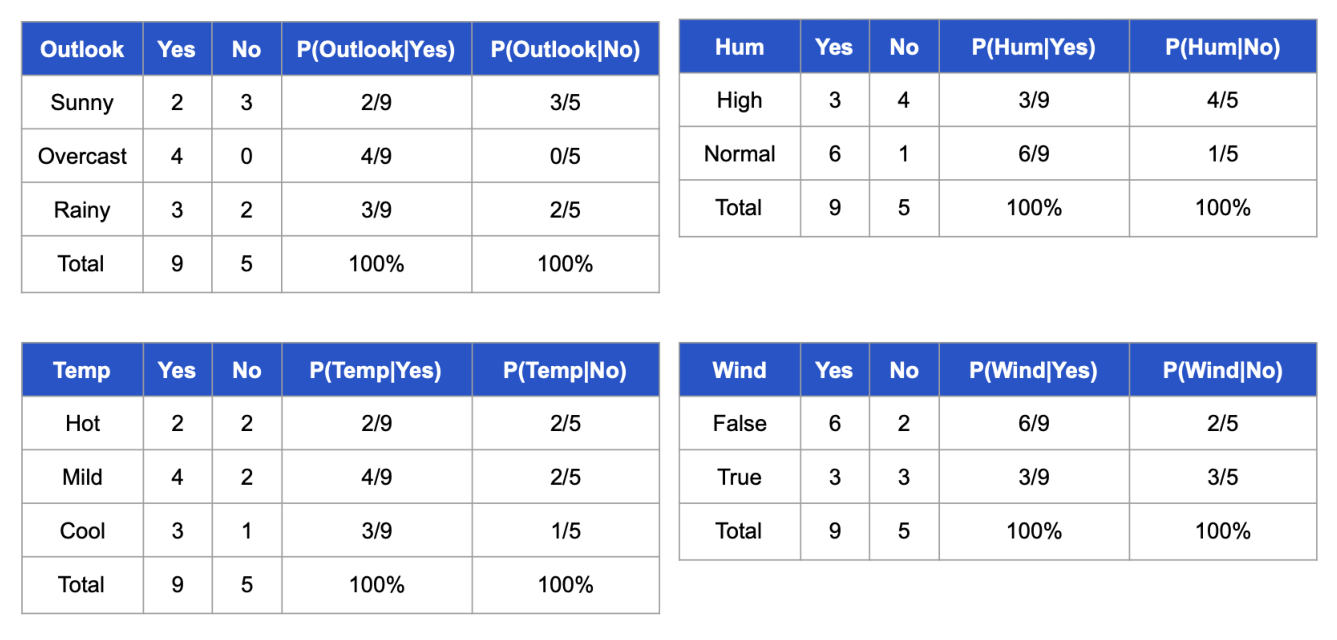

In [5]:
display_img('Table_2.png', 17, 17)

$ \mathbb{P}(x|Yes) = \mathbb{P}(Outlook = Sunny | Yes) \cdot \mathbb{P}(Temperature = Cool | Yes) \cdot \mathbb{P}(Humidity = High | Yes) \cdot \mathbb{P}(Wind = True | Yes) = \cfrac{2}{9} \cdot \cfrac{3}{9} \cdot \cfrac{3}{9} \cdot \cfrac{3}{9} $

$ \mathbb{P}(Yes) = \cfrac{9}{14} $

$ \mathbb{P}(x) = \mathbb{P}(Outlook = Sunny) \cdot \mathbb{P}(Temperature = Cool) \cdot \mathbb{P}(Humidity = High) \cdot \mathbb{P}(Wind = True) = \left( \cfrac{2 + 3}{9 + 5} \right) \cdot \left( \cfrac{3 + 1}{9 + 5} \right) \cdot \left( \cfrac{3 + 4}{9 + 5} \right) \cdot \left( \cfrac{3 + 3}{9 + 5} \right) = \cfrac{5}{14} \cdot \cfrac{4}{14} \cdot \cfrac{7}{14} \cdot \cfrac{6}{14} $

$ \Rightarrow $

$ \mathbb{P}(Yes|x) = \cfrac{\mathbb{P}(x|Yes) \cdot \mathbb{P}(Yes)}{\mathbb{P}(x)} = \cfrac{14 \cdot 14}{3 \cdot 9 \cdot 5 \cdot 6} = 24.2 \% $

In [6]:
start = time.time()

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
from sklearn.datasets import load_iris

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X, y = load_iris(return_X_y = True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)

In [12]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

In [13]:
y_pred = gnb.predict(X_test)

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [15]:
print('Precision:', round(precision_score(y_test, y_pred, average = 'macro')*100, 2))

Precision: 96.08


In [16]:
print('Recall:', round(recall_score(y_test, y_pred, average = 'macro')*100, 2))

Recall: 94.44


In [17]:
print('Accuracy:', round((y_test == y_pred).sum()/len(y_test)*100, 2))

Accuracy: 94.67


### Time of execution

In [18]:
end = time.time()

In [19]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
